In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

In [4]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [95]:
model.fc2.weight[0][0].item()

-0.21741190552711487

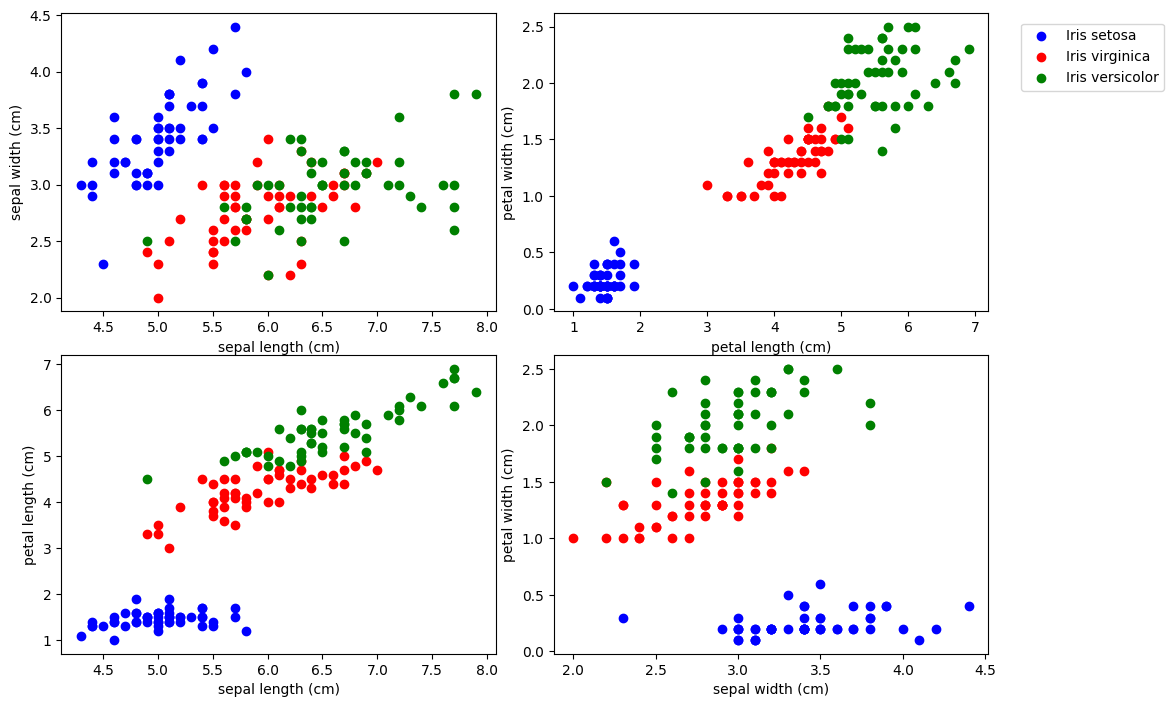

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [6]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [7]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)
        

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:  1  loss: 0.06713330
epoch: 11  loss: 0.06355970
epoch: 21  loss: 0.06085380
epoch: 31  loss: 0.05870985
epoch: 41  loss: 0.05695847
epoch: 51  loss: 0.05549227
epoch: 61  loss: 0.05423797
epoch: 71  loss: 0.05314468
epoch: 81  loss: 0.05217756
epoch: 91  loss: 0.05131226


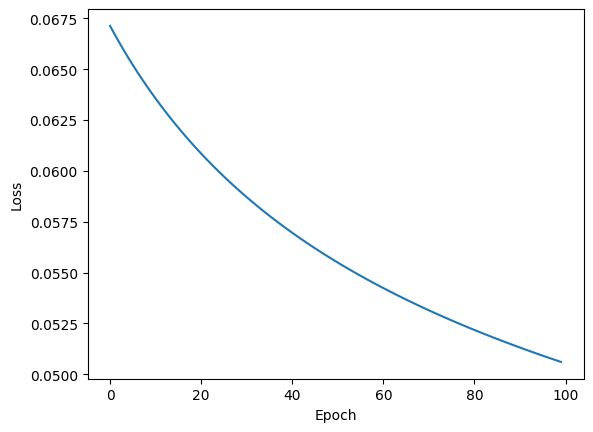

In [16]:
plt.plot(range(epochs),[loss.detach().numpy() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('Epoch');
plt.show()

In [17]:
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.04398538


In [18]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-2.8205,  6.4803, -1.0145])     1
 2. tensor([-2.4630,  7.1412, -1.8081])     1
 3. tensor([  7.9814,   1.1886, -12.2241])  0
 4. tensor([-4.8562,  6.3026,  1.3067])     1
 5. tensor([-9.3934,  4.2225,  7.4338])     2
 6. tensor([-13.4211,   1.8034,  12.8417])  2
 7. tensor([  7.8054,   1.4258, -12.1862])  0
 8. tensor([  8.7649,   1.0591, -13.1944])  0
 9. tensor([-9.3691,  4.2262,  7.3250])     2
10. tensor([-12.0320,   3.1541,  10.7873])  2
11. tensor([-12.5736,   2.8315,  11.5023])  2
12. tensor([  7.9732,   0.9370, -11.9811])  0
13. tensor([-11.9959,   2.5438,  11.0149])  2
14. tensor([-4.8925,  6.0516,  1.4775])     1
15. tensor([-9.9068,  3.9488,  8.0440])     2
16. tensor([-2.4449,  6.9555, -1.6940])     1
17. tensor([-7.3145,  4.6211,  4.8814])     2
18. tensor([  8.9339,   1.0852, -13.4533])  0
19. tensor([-4.5849,  6.2573,  0.9688])     1
20. tensor([-10.1447,   4.6992,   7.8929])  2
21. tensor([  8.4227,   1.0925, -12.7492])  0
22. tensor([  9.1965,   1.2723, -1

In [19]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

In [20]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [21]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.04398538


In [22]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

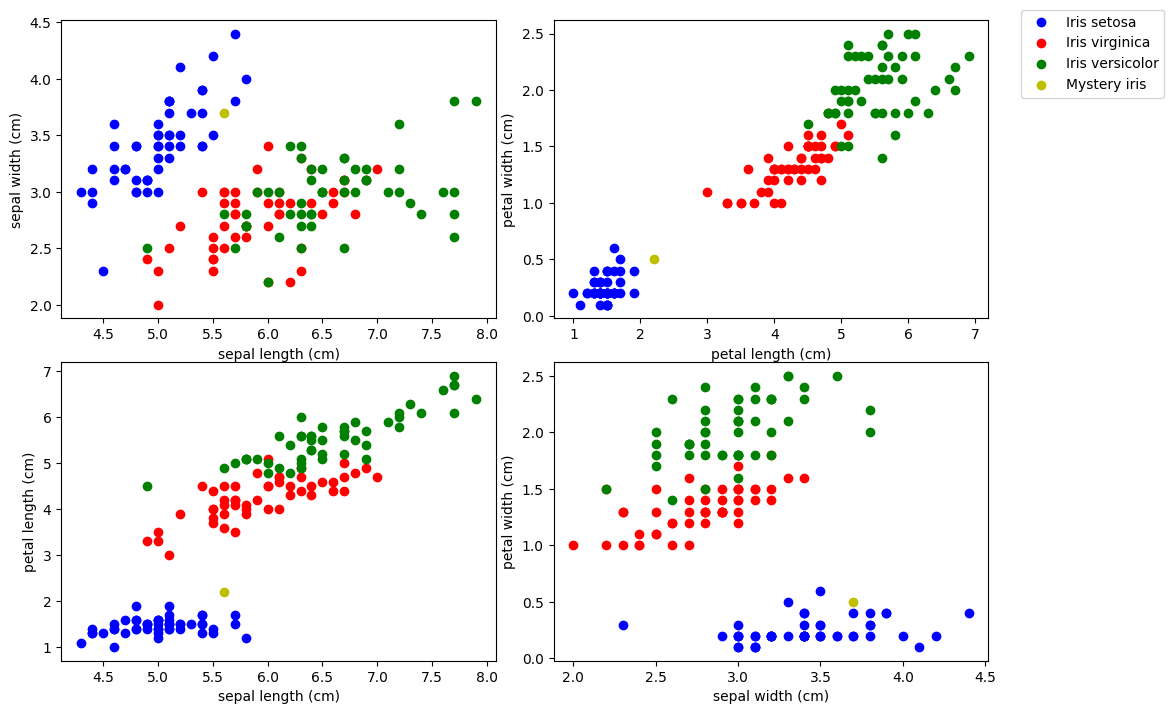

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [24]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([  7.1707,   2.2643, -11.8109])

Iris setosa
